# **Importing Dataset**


In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
ds = pd.read_csv('/content/drive/MyDrive/music_genre.csv')

# Data Preprocessing

In [3]:
ds.shape

(50005, 18)

 Check for missing values in the DataFrame

In [4]:
missing_Val = ds.isnull().sum()
missing_Val

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

checking for duplicates. If found then drop

In [5]:
ds.drop_duplicates(inplace=True)
ds.shape

(50001, 18)

Dropping Null Values.
Reseting the index of the DataFrame and droping the old index column

In [6]:
ds.dropna(inplace=True)
ds.reset_index(drop=True, inplace=True)

Check for Special Character in Column. If found, Replace with Null Values. Convert Column from 'object' to 'float64'.  

In [7]:
ds['tempo']=ds['tempo'].apply(lambda x: np.nan if x=='?' else x)
ds['tempo']=ds['tempo'].astype('float64')

Check for Changes

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             45020 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

Check for A Specific Number (-1). If Found, Replace with Null Value.

In [9]:
ds['duration_ms']=ds['duration_ms'].apply(lambda x: np.nan if x==-1 else x)

Drop Null Values

In [10]:
ds.dropna(inplace=True)

Dropping Columns that would not affect ML Models

In [11]:
drop_col = ['instance_id', 'obtained_date','artist_name','track_name']


ds = ds.drop(columns=drop_col)

Feature Distribution Graph

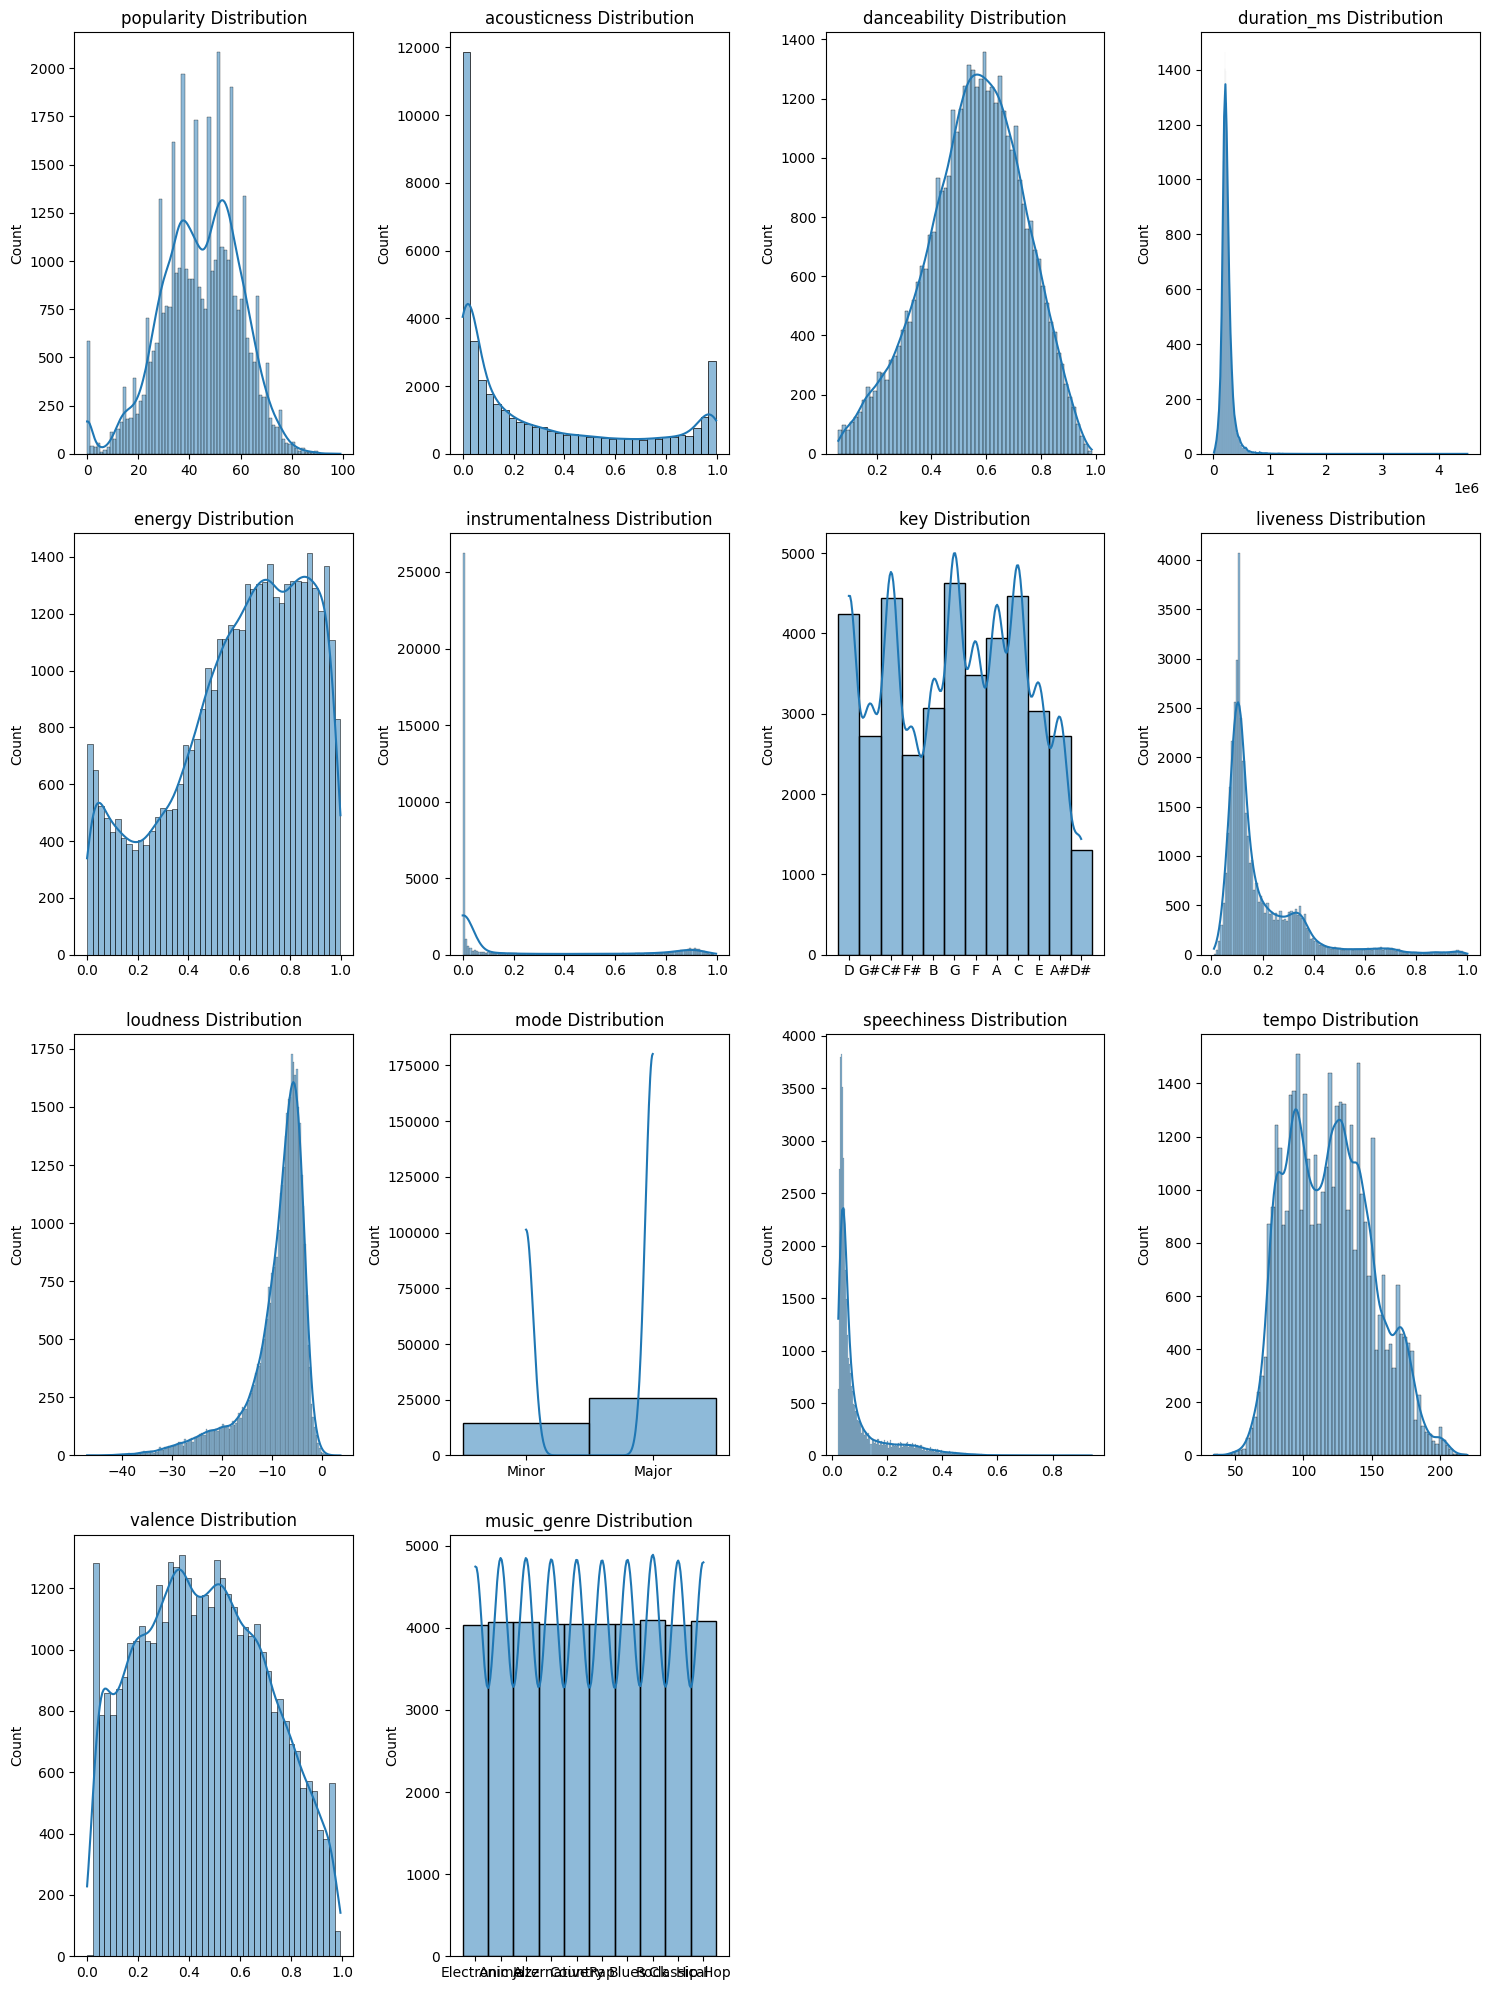

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = len(ds.columns)
num_rows = (num_cols + 3) // 4


plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(ds.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(ds[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Encoding music_genre Column Using LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder
object_cols = ds.select_dtypes(include='object').columns

for object_c in object_cols:
        le = LabelEncoder()
        ds.loc[:,object_c] = le.fit_transform(ds[object_c])
        ds[object_c]=ds[object_c].astype('int64')

<ipython-input-13-2423c21a3154>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ds.loc[:,object_c] = le.fit_transform(ds[object_c])
<ipython-input-13-2423c21a3154>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ds.loc[:,object_c] = le.fit_transform(ds[object_c])
<ipython-input-13-2423c21a3154>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, 

Class Distribution Graph

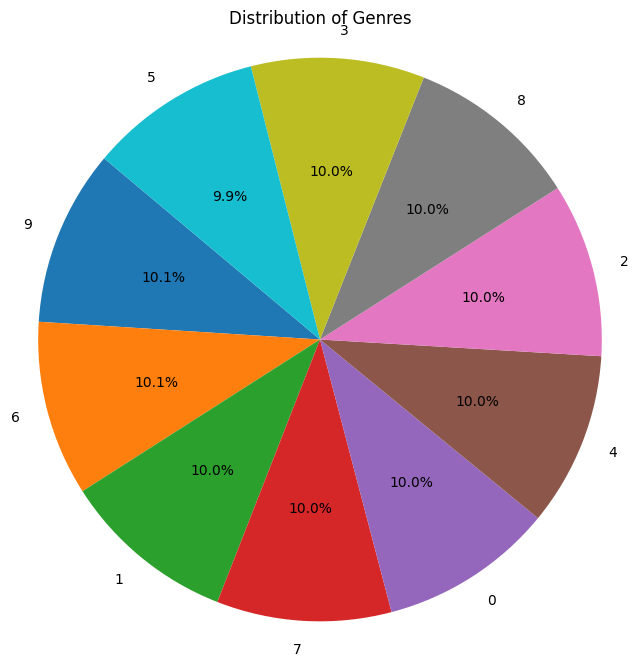

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


genre_counts = ds['music_genre'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genres')
plt.axis('equal')
plt.show()


# Creation of Models

# LogisticRegression

Building The Model

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


logistic_model = LogisticRegression()
logistic_model.fit(x_train_poly, y_train)


y_pred = logistic_model.predict(x_test_poly)


report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.84      0.85       152
           1       0.84      0.86      0.85       148

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



Grid Search for The Model

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

logistic_model = LogisticRegression()


grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_poly, y_train)


best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(x_test_poly)


accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.8533333333333334


Cross Validation for The Model

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)


logistic_model = LogisticRegression()


accuracy_scores = cross_val_score(logistic_model, x_poly, y, cv=5)


mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Mean Accuracy: 0.8690000000000001
Standard Deviation of Accuracy: 0.009695359714832666


Confusion Matrix


[[129  23]
 [ 21 127]]


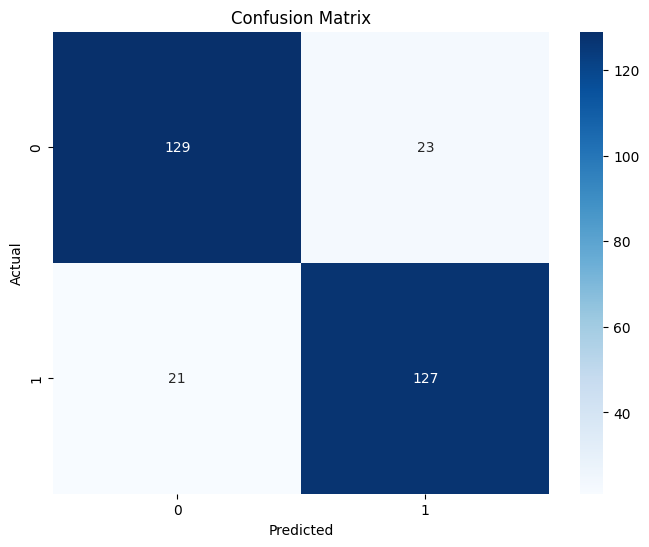

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming x_train, x_test, y_train, y_test are your training and testing sets
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Set figure size before plotting
plt.figure(figsize=(8, 6))

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Random Forrest

Building The Model

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


rf_model = RandomForestClassifier(random_state=50)
rf_model.fit(x_train_poly, y_train)


y_pred = rf_model.predict(x_test_poly)


report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.90      0.87      0.89       152
           1       0.87      0.91      0.89       148

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



Grid Search for The Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_model = RandomForestClassifier(random_state=50)


grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8666666666666667


Cross Validation for The Model

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)


rf_model = RandomForestClassifier(random_state=50)


accuracy_scores = cross_val_score(rf_model, x_poly, y, cv=5)


mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)





Mean Accuracy: 0.8700000000000001
Standard Deviation of Accuracy: 0.013038404810405309


[[132  20]
 [ 14 134]]


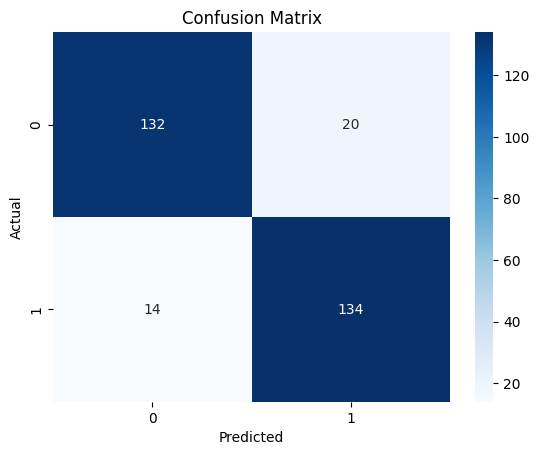

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

rf_model = RandomForestClassifier(random_state=50)
rf_model.fit(x_train_poly, y_train)

y_pred = rf_model.predict(x_test_poly)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Support Vector Machine

Building The Model

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

svm_model = SVC(kernel='linear')
svm_model.fit(x_train_poly, y_train)


y_pred = svm_model.predict(x_test_poly)


report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       152
           1       0.85      0.87      0.86       148

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Grid Search for The Model

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}


svm_model = SVC()


grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_poly, y_train)


best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(x_test_poly)


accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.8733333333333333


Cross Validation for The Model

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)


svm_model = SVC(kernel='linear')


accuracy_scores = cross_val_score(svm_model, x_poly, y, cv=5)


mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Mean Accuracy: 0.8700000000000001
Standard Deviation of Accuracy: 0.006324555320336764


[[129  23]
 [ 19 129]]


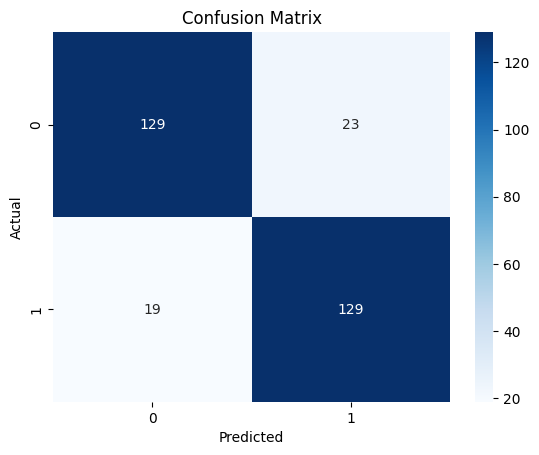

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

svm_model = SVC(kernel='linear')
svm_model.fit(x_train_poly, y_train)

y_pred = svm_model.predict(x_test_poly)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Artificial Neural Network

Building the Model

In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(x_train_poly.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




history = model.fit(
    x_train_poly, y_train,
    validation_data=(x_test_poly, y_test),
    epochs=100

)


y_pred_prob = model.predict(x_test_poly)
y_pred = (y_pred_prob > 0.5).astype(int)
report = classification_report(y_test, y_pred)
print(report)


Epoch 1/100
22/22 [==============================] - 1s 14ms/step - loss: 0.5396 - accuracy: 0.7929 - val_loss: 0.4145 - val_accuracy: 0.8533
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3579 - accuracy: 0.8743 - val_loss: 0.3125 - val_accuracy: 0.8533
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2981 - accuracy: 0.8686 - val_loss: 0.2910 - val_accuracy: 0.8567
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2840 - accuracy: 0.8814 - val_loss: 0.2844 - val_accuracy: 0.8600
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2789 - accuracy: 0.8700 - val_loss: 0.2849 - val_accuracy: 0.8567
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2715 - accuracy: 0.8771 - val_loss: 0.2793 - val_accuracy: 0.8633
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2751 - accuracy: 0.8743 - val_loss: 0.2816 - val_accuracy: 0.8567
Epoch 8/100


Grid Search for The Model

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


def create_model(neurons=1, optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train_poly.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

best_accuracy = 0
best_params = {}


neurons_list = [50, 100, 150]
optimizer_list = ['adam', 'sgd']


for neurons in neurons_list:
    for optimizer in optimizer_list:
        model = create_model(neurons=neurons, optimizer=optimizer)
        model.fit(x_train_poly, y_train, epochs=100, verbose=0)
        _, accuracy = model.evaluate(x_test_poly, y_test, verbose=0)
        print(f"Neurons: {neurons}, Optimizer: {optimizer}, Accuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'neurons': neurons, 'optimizer': optimizer}

print(f"Best Accuracy: {best_accuracy} using {best_params}")


Neurons: 50, Optimizer: adam, Accuracy: 0.8700000047683716
Neurons: 50, Optimizer: sgd, Accuracy: 0.8633333444595337
Neurons: 100, Optimizer: adam, Accuracy: 0.8733333349227905
Neurons: 100, Optimizer: sgd, Accuracy: 0.8633333444595337
Neurons: 150, Optimizer: adam, Accuracy: 0.8833333253860474
Neurons: 150, Optimizer: sgd, Accuracy: 0.8566666841506958
Best Accuracy: 0.8833333253860474 using {'neurons': 150, 'optimizer': 'adam'}


Cross Validation for The Model

In [29]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)


model = Sequential([
    Dense(100, activation='relu', input_shape=(x_poly.shape[1],)),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
accuracy_scores = []

for train_index, test_index in kf.split(x_poly, y):
    x_train, x_test = x_poly[train_index], x_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]


    model.fit(x_train, y_train, epochs=100, verbose=0)


    _, accuracy = model.evaluate(x_test, y_test, verbose=0)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")


Mean Accuracy: 0.8960000038146972
Standard Deviation: 0.028178005387223138


Epoch 1/100
22/22 [==============================] - 2s 19ms/step - loss: 0.6250 - accuracy: 0.7200 - val_loss: 0.4767 - val_accuracy: 0.8600
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 0.4220 - accuracy: 0.8771 - val_loss: 0.3540 - val_accuracy: 0.8567
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.3325 - accuracy: 0.8786 - val_loss: 0.3066 - val_accuracy: 0.8567
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 0.2989 - accuracy: 0.8729 - val_loss: 0.2915 - val_accuracy: 0.8633
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.2856 - accuracy: 0.8743 - val_loss: 0.2886 - val_accuracy: 0.8533
Epoch 6/100
22/22 [==============================] - 0s 9ms/step - loss: 0.2825 - accuracy: 0.8786 - val_loss: 0.2833 - val_accuracy: 0.8633
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 0.2758 - accuracy: 0.8800 - val_loss: 0.2805 - val_accuracy: 0.8600
Epoch 8/100

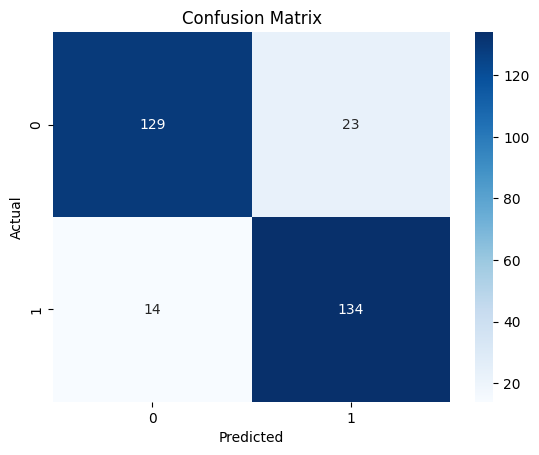

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures

x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(x_train_poly.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train_poly, y_train,
    validation_data=(x_test_poly, y_test),
    epochs=100
)

y_pred_prob = model.predict(x_test_poly)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


10/10 [==============================] - 0s 2ms/step


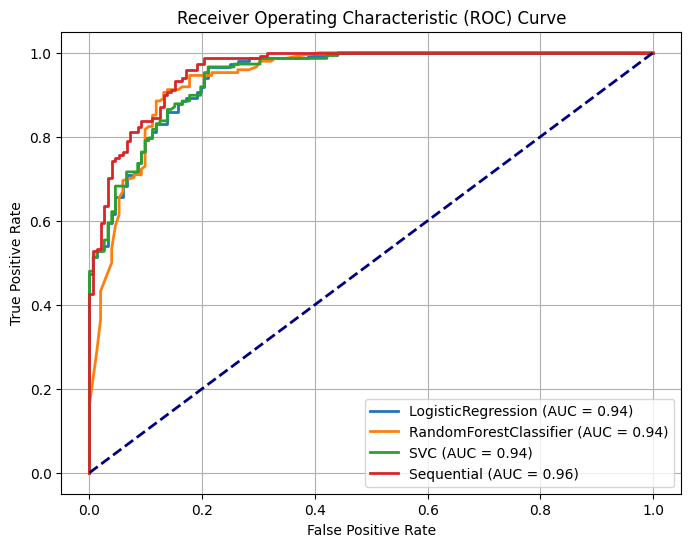

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report


x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=50)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


models = [
    LogisticRegression(),
    RandomForestClassifier(random_state=50),
    SVC(kernel='linear', probability=True),
    tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=(x_train_poly.shape[1],)),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
]


plt.figure(figsize=(8, 6))
for model in models:
    if isinstance(model, tf.keras.Sequential):
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(x_train_poly, y_train, epochs=100, verbose=0)
        y_score = model.predict(x_test_poly).ravel()
    else:
        model.fit(x_train_poly, y_train)
        y_score = model.predict_proba(x_test_poly)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
